# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Multi-Class Logistic Regression: Iris Dataset</p>


<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction
### About the Data

We will work with the classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper. 

The data set consists of 50 samples from each of **three species of Iris (Iris setosa, Iris virginica and Iris versicolor)**. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

See: https://en.wikipedia.org/wiki/Iris_flower_data_set
</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [24]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Let's take a look at the label column
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

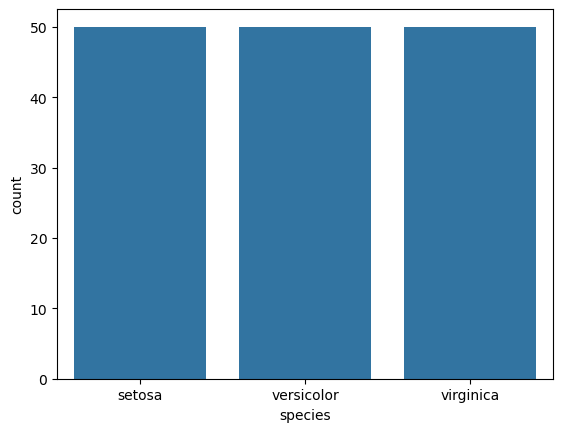

In [12]:
# There are the same amount of samples for each species.
# Yet, we can check whwther it is imbalanced data or not

sns.countplot(df, x="species");

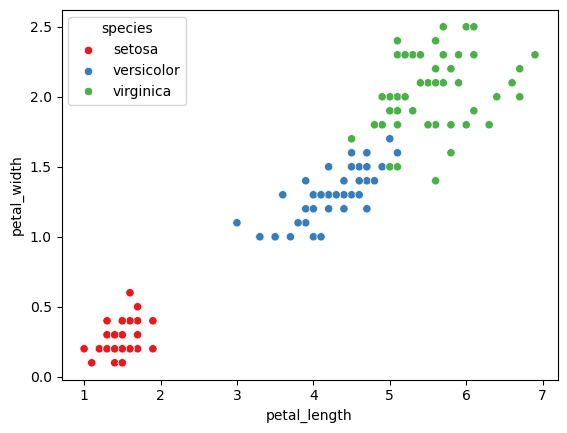

In [20]:
# Compare two features according to three species
sns.scatterplot(df, x="petal_length", y="petal_width", hue="species", palette="Set1");

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

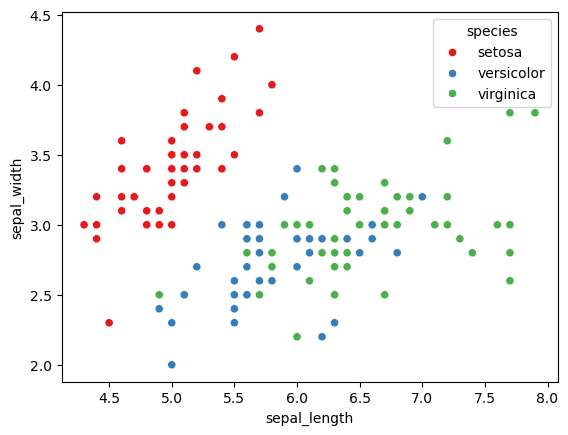

In [23]:
sns.scatterplot(df, x='sepal_length',y='sepal_width',hue='species',palette="Set1")

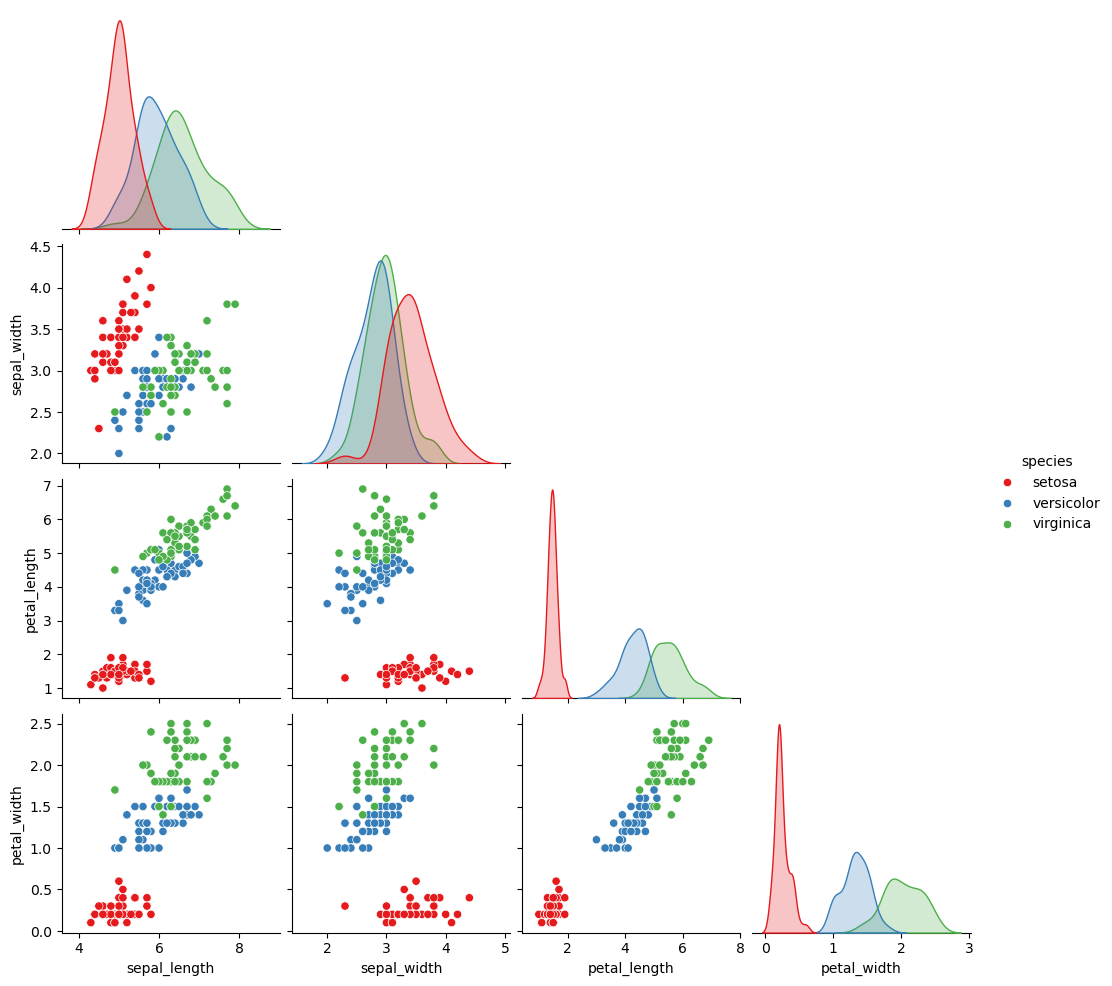

In [19]:
sns.pairplot(df, hue="species", corner=True, palette="Set1");

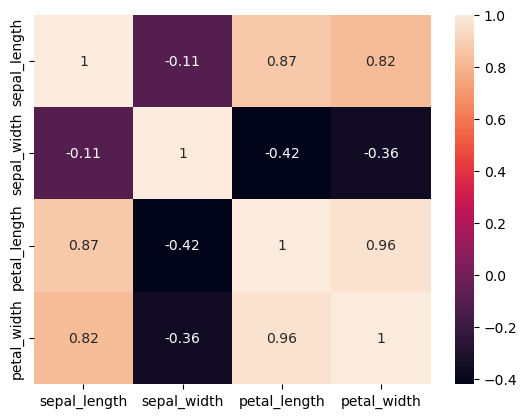

In [22]:
# Look at the correlation

sns.heatmap(df.corr(numeric_only=True), annot=True);

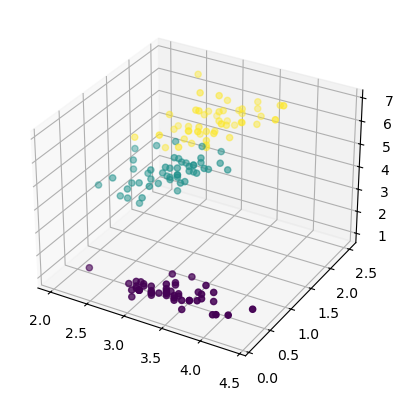

In [25]:
# 3-D Plot

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

## Train | Test Split and Scaling

In [26]:
# Features
X = df.drop("species", axis=1)

# Target lable
y = df["species"]

In [27]:
y

# Here, the categories of the target label are string. 
# But, we do not need to convert them into numbers like 0,1,2

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
scaler = StandardScaler()

In [32]:
# fit and transform for X_train
scaled_X_train = scaler.fit_transform(X_train) 

# just transform for X_test (to prevent data leakage)
scaled_X_test = scaler.transform(X_test) 

## Multi-Class Logistic Regression Model

In [33]:
# Since we are going to use GridSearchCV, we can choose LogisticRegression model without CV

from sklearn.linear_model import LogisticRegression

# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [34]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

# Currently the 'multinomial' option is supported only by the 'lbfgs','sag', 'saga' and 'newton-cg' solvers.
# For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
# ovr: one versus rest ( If the option chosen is 'ovr', then a binary problem is fit for each label.)

## GridSearch for Best Hyper-Parameters

In [42]:
# List of parameters
penalty = ['l1', 'l2']
C = np.logspace(0,4,10) # Use logarithmically spaced C values (recommended in official docs)

param_grid = {'penalty':penalty, 'C':C}

In [43]:
# Grid model

grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [44]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\admin\anacond

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([ 0.1       ,  0.50612245,  0.9122449 ,  1.31836735,  1.7244898 ,
        2.13061224,  2.53673469,...
        8.22244898,  8.62857143,  9.03469388,  9.44081633,  9.84693878,
       10.25306122, 10.65918367, 11.06530612, 11.47142857, 11.87755102,
       12.28367347, 12.68979592, 13.09591837, 13.50204082, 13.90816327,
       14.31428571, 14.72040816, 15.12653061, 15.53265306, 15.93877551,
       16.34489796, 16.75102041, 17.15714286, 17.56326531, 17.96938776,
       18.3755102 , 18.78163265, 19.1877551 , 19.59387755, 20.        ]),
                         'penalty': ['l1', 'l2']})

In [45]:
grid_model.best_params_

{'C': 7.742636826811269, 'l1_ratio': 0.1, 'penalty': 'l1'}

## Model Performance on Classification Tasks

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# "plot_confusion_matrix" is not in use anymore

In [48]:
y_pred = grid_model.predict(scaled_X_test)

In [50]:
# We can see the predictions
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [49]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [51]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay  

# "from sklearn.metrics import plot_confusion_matrix" is not in use

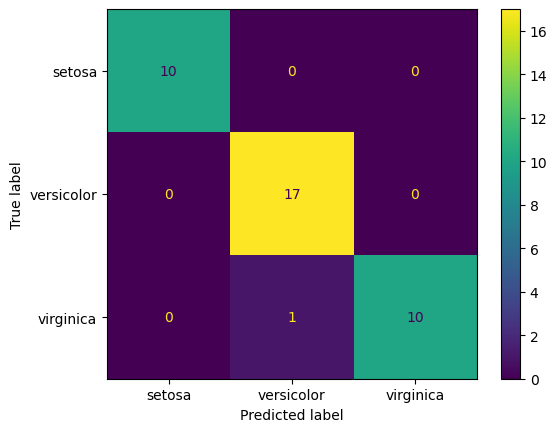

In [53]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred);

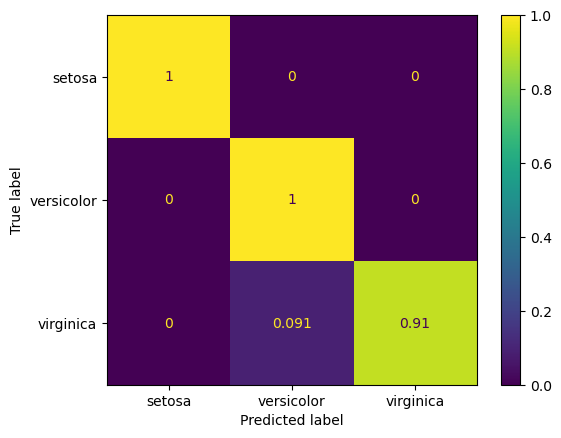

In [55]:
# See the normalized values (scaled according to max 1)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, normalize="true");

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## ROC Curve and AUC (Area Under the Curve)

In [ ]:
# The codes below are not in use anymore
# from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
# plot_precision_recall_curve(log_model,scaled_X_test,y_test)
# plot_roc_curve(log_model, scaled_X_test, y_test)

# Also in multiclass classification model it would not work

In [59]:
from sklearn.metrics import roc_curve, auc


def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

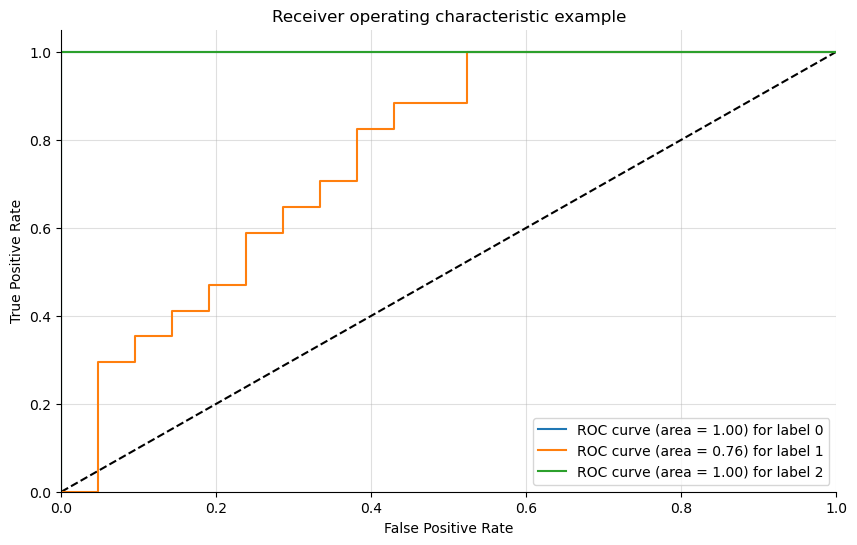

In [63]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(10, 6))

As seen from the classification report and the ROC, the model failed to predict one class: virginica. It predicted virginica (true label) as versicolor (predicted label). Yet, we have 0.91 recall and 0.95 F1 scores for virginica. The overall accuracy is 0.97.